# Intro
이 주피터 노트북은 xAPI 형태의 데이터를 탐색적으로 분석하는데 그 목적이 있음

In [1]:
#Package

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# JSON Parsing

In [2]:
#데이터 업로드

with open("data/XAPI_npe_1215.json", "r", encoding="utf8") as f:
    contents = f.read() #String type
    json_data = json.loads(contents)

In [3]:
#json_data의 타입은 list임
#그 안에 xAPI 데이터를 dict형태로 보관하고 있음
#따라서 조회하기 위해서는 리스트 데이터 indexing을 통해 각각의 데이터에 접근하고
#이후 딕셔너리를 조작하는 방식으로 작업해야 함
print("첫번째 xAPI: ", json_data[0])
print("첫번째 xAPI의 Actor의 value: ", json_data[0]['actor'])

첫번째 xAPI:  {'actor': {'mbox': 'mailto:learner10@gmail.com', 'name': 'learner10', 'objectType': 'Agent'}, 'id': '5d93125a-3428-3cd6-b4e1-290a7c46d98e', 'object': {'definition': {'name': {'en-US': '삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)', 'ko-KR': '삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)'}}, 'id': 'http://127.0.0.1:3000/learner/video/1c9902', 'objectType': 'Activity'}, 'stored': '2021-12-14T18:33:42.326', 'timestamp': '2021-12-14T18:33:42.326', 'verb': {'display': {'en-US': 'view', 'ko-KR': '시청기록'}, 'id': 'http://adlnet.gov/expapi/verbs/view'}}
첫번째 xAPI의 Actor의 value:  {'mbox': 'mailto:learner10@gmail.com', 'name': 'learner10', 'objectType': 'Agent'}


### Parsing할 데이터의 목록
1. actor(name)
2. object - definition - name - ko-KR
3. timestamp
4. verb, display - ko-KR

In [4]:
#데이터를 받을 리스트 준비

#actor에서 name만 추출
actor_list = []
#object에서 definition - name - ko-KR에 있는 데이터만 담기
object_list = []
#verb에서 display - ko-KR만 추출
verb_list = []
#timestamp
timestamp_list = []

In [5]:
#6번에 object 없음
print(json_data[5]['object']['definition']['name']['ko-KR'])

print(json_data[6]['object'] == {})

print(json_data[6])

print(True or False)

삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)
True
{'actor': {'mbox': 'mailto:learner10@gmail.com', 'name': 'learner10', 'objectType': 'Agent'}, 'id': '88a312df-60bd-30c0-a0ca-9afd862fa0c4', 'object': {}, 'stored': '2021-12-14T18:33:49.432', 'timestamp': '2021-12-14T18:33:49.432', 'verb': {'display': {'en-US': 'quiz_show', 'ko-KR': '퀴즈/메시지 등장'}, 'id': 'http://adlnet.gov/expapi/verbs/quiz_show'}}
True


In [6]:
for i, xapi in enumerate(json_data):

    #object에 있는 결측치를 대체함
    if xapi['object'] == {}:
        json_data[i]['object'] = {'definition': {'name': {'ko-KR': 'none'}}}
    
    actor_var = xapi['actor']['name']
    object_var = xapi['object']['definition']['name']['ko-KR']
    verb_var = xapi['verb']['display']['ko-KR']
    timestamp_var = xapi['timestamp']

    actor_list.append(actor_var)
    object_list.append(object_var)
    verb_list.append(verb_var)
    timestamp_list.append(timestamp_var)

# print(actor_list)
# print(object_list)
# print(verb_list)
# print(timestamp_list)

# Pandas EDM

In [7]:
df_data = pd.DataFrame(
    {
        'actor' : actor_list,
        'object' : object_list,
        'verb' : verb_list,
        'timestamp' : timestamp_list
    }
)

print(df_data.size)

df_data.head(20)

115068


,actor,object,verb,timestamp
0,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청기록,2021-12-14T18:33:42.326
1,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:43.406
2,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),실행,2021-12-14T18:33:45.010
3,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:46.410
4,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:47.424
5,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:48.417
6,learner10,none,퀴즈/메시지 등장,2021-12-14T18:33:49.432
7,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),중지,2021-12-14T18:33:49.433
8,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:49.442
9,learner10,[1c9902] 성공을 위해서 가장 필요하다고 생각하는 것을 한 가지 고른다면?,퀴즈/메시지 응답,2021-12-14T18:33:52.300


In [8]:
df_data['actor'].unique()

array(['learner10', '6_3_19@g.cnees.kr', 'qwertyuiop', '6_3_5@g.cnees.kr',
       'bonhyuk', '6_3_11@g.cnees.kr', '6_3_13@g.cnees.kr',
       '6_3_9_2@g.cnees.kr', '정윤석', '6_3_2@g.cnees.kr', 'kfc', '임세현',
       '6_3_1@g.cnees.kr', 'g.cnees.kr', 'eunhalim0908',
       '6_3_27@g.cnees.kr', '6_3_12@g.cnees.kr', '6_3_6@g.cnees.kr',
       '6_3_26@g.cnees.kr', '6_3_17@g.cnees.kr', 'jisu0512', '안성민',
       '6_3_18@g.cnees.kr', '6_3_14@g.cnees.kr', '6_3_20@g.cnees.kr',
       '6_3_8@g.cnees.kr', 'npe#31'], dtype=object)

In [9]:
df_data['object'].unique()

#삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT) - 영상
#[1c9902] 성공을 위해서 가장 필요하다고 생각하는 것을 한 가지 고른다면? - 퀴즈(앞)
#[1c9902]  IQ, 재능, 환경을 뛰어넘는 열정적 끈기의 힘을 의미하는 단어는 무엇인가요?'] - 퀴즈(뒤)
#none - 결측치

array(['삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)', 'none',
       '[1c9902] 성공을 위해서 가장 필요하다고 생각하는 것을 한 가지 고른다면?',
       '[1c9902]  IQ, 재능, 환경을 뛰어넘는 열정적 끈기의 힘을 의미하는 단어는 무엇인가요?'],
      dtype=object)

In [10]:
df_data['verb'].unique()

array(['시청기록', '시청중', '실행', '퀴즈/메시지 등장', '중지', '퀴즈/메시지 응답', '재생바 클릭',
       '강의 평가 등장', '강의 평가 제출'], dtype=object)

In [11]:
#결측 확인
df_data.isnull().sum()

actor        0
object       0
verb         0
timestamp    0
dtype: int64

In [12]:
#actor 중 learner10 행 삭제(실제 학생 아님)

del_index_actor = df_data[df_data['actor'] == "learner10"].index
df_data_clean = df_data.drop(del_index_actor)

df_data_clean['actor'].unique()

array(['6_3_19@g.cnees.kr', 'qwertyuiop', '6_3_5@g.cnees.kr', 'bonhyuk',
       '6_3_11@g.cnees.kr', '6_3_13@g.cnees.kr', '6_3_9_2@g.cnees.kr',
       '정윤석', '6_3_2@g.cnees.kr', 'kfc', '임세현', '6_3_1@g.cnees.kr',
       'g.cnees.kr', 'eunhalim0908', '6_3_27@g.cnees.kr',
       '6_3_12@g.cnees.kr', '6_3_6@g.cnees.kr', '6_3_26@g.cnees.kr',
       '6_3_17@g.cnees.kr', 'jisu0512', '안성민', '6_3_18@g.cnees.kr',
       '6_3_14@g.cnees.kr', '6_3_20@g.cnees.kr', '6_3_8@g.cnees.kr',
       'npe#31'], dtype=object)

## 1. 활동량 분석

In [13]:
#활동량 분석
#각각의 학생별로 총 로그 수를 계산

student_total_logs = {}

for student in df_data_clean['actor'].unique():
    student_total_logs[student] = len(df_data[df_data['actor'] == student])

print(student_total_logs)

{'6_3_19@g.cnees.kr': 1231, 'qwertyuiop': 1831, '6_3_5@g.cnees.kr': 1476, 'bonhyuk': 1485, '6_3_11@g.cnees.kr': 1230, '6_3_13@g.cnees.kr': 1303, '6_3_9_2@g.cnees.kr': 727, '정윤석': 1240, '6_3_2@g.cnees.kr': 1614, 'kfc': 1382, '임세현': 1247, '6_3_1@g.cnees.kr': 1225, 'g.cnees.kr': 1116, 'eunhalim0908': 971, '6_3_27@g.cnees.kr': 1273, '6_3_12@g.cnees.kr': 1204, '6_3_6@g.cnees.kr': 1052, '6_3_26@g.cnees.kr': 159, '6_3_17@g.cnees.kr': 1253, 'jisu0512': 654, '안성민': 1010, '6_3_18@g.cnees.kr': 97, '6_3_14@g.cnees.kr': 704, '6_3_20@g.cnees.kr': 634, '6_3_8@g.cnees.kr': 1264, 'npe#31': 1359}


In [14]:
print(sorted(student_total_logs.items(), key = lambda x: x[1], reverse = True))

[('qwertyuiop', 1831), ('6_3_2@g.cnees.kr', 1614), ('bonhyuk', 1485), ('6_3_5@g.cnees.kr', 1476), ('kfc', 1382), ('npe#31', 1359), ('6_3_13@g.cnees.kr', 1303), ('6_3_27@g.cnees.kr', 1273), ('6_3_8@g.cnees.kr', 1264), ('6_3_17@g.cnees.kr', 1253), ('임세현', 1247), ('정윤석', 1240), ('6_3_19@g.cnees.kr', 1231), ('6_3_11@g.cnees.kr', 1230), ('6_3_1@g.cnees.kr', 1225), ('6_3_12@g.cnees.kr', 1204), ('g.cnees.kr', 1116), ('6_3_6@g.cnees.kr', 1052), ('안성민', 1010), ('eunhalim0908', 971), ('6_3_9_2@g.cnees.kr', 727), ('6_3_14@g.cnees.kr', 704), ('jisu0512', 654), ('6_3_20@g.cnees.kr', 634), ('6_3_26@g.cnees.kr', 159), ('6_3_18@g.cnees.kr', 97)]


In [21]:
student_total_logs_sorted = sorted(student_total_logs.items(), key = lambda x: x[1], reverse = True)

students = []
total_logs = []

for stu, log in student_total_logs_sorted:
    students.append(stu)
    total_logs.append(log)

print(students)
print(total_logs)

['qwertyuiop', '6_3_2@g.cnees.kr', 'bonhyuk', '6_3_5@g.cnees.kr', 'kfc', 'npe#31', '6_3_13@g.cnees.kr', '6_3_27@g.cnees.kr', '6_3_8@g.cnees.kr', '6_3_17@g.cnees.kr', '임세현', '정윤석', '6_3_19@g.cnees.kr', '6_3_11@g.cnees.kr', '6_3_1@g.cnees.kr', '6_3_12@g.cnees.kr', 'g.cnees.kr', '6_3_6@g.cnees.kr', '안성민', 'eunhalim0908', '6_3_9_2@g.cnees.kr', '6_3_14@g.cnees.kr', 'jisu0512', '6_3_20@g.cnees.kr', '6_3_26@g.cnees.kr', '6_3_18@g.cnees.kr']
[1831, 1614, 1485, 1476, 1382, 1359, 1303, 1273, 1264, 1253, 1247, 1240, 1231, 1230, 1225, 1204, 1116, 1052, 1010, 971, 727, 704, 654, 634, 159, 97]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_

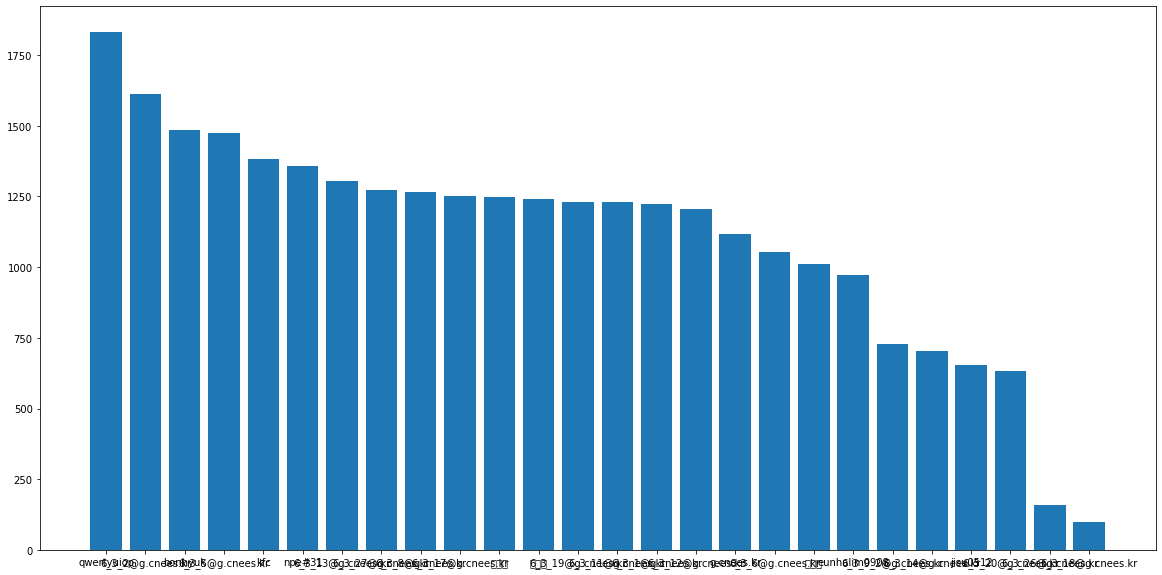

In [22]:
plt.figure(figsize = (20, 10))
plt.bar(students, total_logs)
plt.show()

## 2. 시청 시간 분석

In [29]:
df_data_clean['verb'].unique()

verb_counts = {}

for v in df_data_clean['verb'].unique():
    verb_counts[v] = len(df_data[df_data['verb'] == v])

print(verb_counts)

{'시청기록': 39, '시청중': 27142, '실행': 315, '중지': 508, '퀴즈/메시지 등장': 64, '퀴즈/메시지 응답': 62, '재생바 클릭': 11, '강의 평가 등장': 400, '강의 평가 제출': 226}
